# Chapter 1 - Questions 4-6

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

### Question 4

#### a)

The PDF: $f(x;\theta) = \frac{1}{\pi(1+(x-\theta)^2)}$;<br><br>
The likelihood function: <br>
$L(\theta;X_{1:n}) = \frac{1}{\pi^n\prod_{i = 1}^{n}(1+(X_i-\theta)^2)}$  <br><br>
The Log-likelihood function: <br> 
$l(\theta) =  -nlog\pi-\Sigma^n_{i=1}log(1+(X_i-\theta)^2)$<br><br>
The first-order derivative of the log-likelihood function: <br>
$\frac{dl(\theta)}{d\theta} = -2\Sigma^n_{i=1}\frac{\theta-X_i}{1+(\theta-X_i)^2}$
<br><br>
The second-order derivative of the log-likelihood function: <br>
$\frac{d^2l(\theta)}{d\theta^2} = -2\Sigma^n_{i=1}\frac{1-(\theta-X_i)^2}{(1+(\theta-X_i)^2)^2}$

In [2]:
# Load the data
MyX = np.array([1.77,-0.23,2.76,3.80,3.47,56.75,-1.34,4.24,-2.44,3.29,3.71,-2.40,4.53,-0.07,-1.05,-13.87,-2.53,-1.75,0.27,43.21])
n = MyX.size

# Create the log-likelihood function
logL = lambda theta, X: -X.size*np.log(np.pi) -  np.sum(np.log(1+(X-theta)**2))  
                # logL Only work when theta is a scalar (can't broadcast) 

# Wrap the log-likelihood function using the X defined previously and making it broadcastable 
MyLogL = np.vectorize(lambda theta: logL(theta, MyX))
                # MyX is evaluated from global symbal table whenever MyLogL is called.

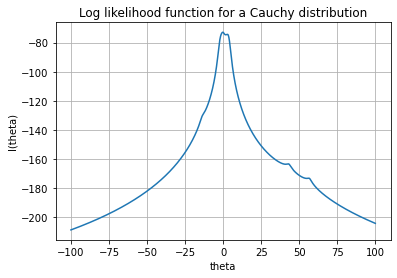

In [3]:
# Generate the Graph
fig, ax = plt.subplots()

ax.set_xlabel('theta')
ax.set_ylabel('l(theta)')
ax.set_title('Log likelihood function for a Cauchy distribution')
ax.grid()
MyTheta = np.arange(-100,100,0.001)
ax.plot(MyTheta, MyLogL(MyTheta))

In [4]:
# Implement Newtion's method
def newton(f, df, x0, tol):
    '''Using newtons method to solve f(x) = 0 numerically, where df is the derivative of f.
        For the sake of doing analysis, 
        1. The value of x will be printed for each iteration.
        2. The failure of convergence will force the algorithm to exit. (RuntimeError will be raised)
        3. The Derivative is checked not to be zero.
    '''
    print('------Starting iteration------')
    
    # Record the number of iterations
    count = 0
    while 1:
        try:
            x1 = x0 - f(x0)/df(x0)
        except ZeroDivisionError:
            print("The derivative at the point is 0! Newtion's method fails!")
        print('%.10f' %x1)
        count = count + 1  
        if abs(x1-x0) < tol:
            print('-------End of iteration-------')
            break
        if count > 10**3:
            raise RuntimeError("Too many iterations without converge!")
        x0 = x1
    return x1

# First-order and Second-order derivative of MylogL
dlogL = lambda theta: -2*np.sum((theta - MyX)/(1+(theta - MyX)**2))
ddlogL = lambda theta: -2*np.sum((1-(theta - MyX)**2)/(1+(theta - MyX)**2)**2)

##### -11 case:

In [5]:
x0 = -11
newton(dlogL,ddlogL,x0,10**-10)

------Starting iteration------
-16.4933088201
-25.2906042877
-48.4255972171
-97.3248058797
-196.6798357873
-396.5837181164
-797.2126470840
-1598.9651867760
-3202.7435482299
-6410.4441268492
-12825.9191148359
-25656.9064948377
-51318.9000806694
-102642.8966964086
-205290.8946577417
-410586.8929472924
-821178.8907103261
-1642362.8868284822
-3284730.8793608686
-6569466.8645736873
-13138938.8350733519
-26277882.7761096954
-52555770.6582008898
-105111546.4223925173
-210223097.9507804215
-420446201.0075585842
-840892407.1211159229
-1681784819.3482310772
-3363569643.8024616241
-6727139292.7109222412
-13454278590.5278434753
-26908557186.1616897583
-53817114377.4293823242
-107634228759.9647674561
-215268457525.0355224609
-430536915055.1770629883
-861073830115.4599609375
-1722147660236.0258789062
-3444295320477.1572265625
-6888590640959.4199218750
-13777181281923.9453125000
-27554362563852.9960937500
-55108725127711.1015625000
-110217450255427.3125000000
-220434900510859.7500000000
-440869801021

<ipython-input-4-e15ec5f39fe9>:30: RuntimeWarning: overflow encountered in square
  ddlogL = lambda theta: -2*np.sum((1-(theta - MyX)**2)/(1+(theta - MyX)**2)**2)
<ipython-input-4-e15ec5f39fe9>:15: RuntimeWarning: divide by zero encountered in double_scalars
  x1 = x0 - f(x0)/df(x0)
<ipython-input-4-e15ec5f39fe9>:29: RuntimeWarning: invalid value encountered in true_divide
  dlogL = lambda theta: -2*np.sum((theta - MyX)/(1+(theta - MyX)**2))
<ipython-input-4-e15ec5f39fe9>:30: RuntimeWarning: invalid value encountered in true_divide
  ddlogL = lambda theta: -2*np.sum((1-(theta - MyX)**2)/(1+(theta - MyX)**2)**2)


RuntimeError: Too many iterations without converge!

Analysis: It diverges to $-\infty$. The first-order derivative of the log-likehood function $\frac{df}{d\theta}(\theta)$ converges to zero when $\theta \rightarrow -\infty$ without actually hitting zero. Therefore, when the initial value is small enough, e.g., $\theta_0 = -11$, *s.t.* the first-order derivative of  $\frac{df}{d\theta}(\theta)$  evaluated at $\theta_0$ is smaller than 0, the algorithm might diverge to $-\infty$.

##### -1 case

In [6]:
x0 = -1
x_hat = newton(dlogL,ddlogL,x0,10**-10)
print(x_hat)

------Starting iteration------
-0.2414495684
-0.1915098721
-0.1922864676
-0.1922866132
-0.1922866132
-------End of iteration-------
-0.19228661322965124


In [7]:
# Analysis:


print(ddlogL(x_hat))
print(logL(x_hat,MyX))

# It looks good! Second order derivative is negative, making it a at least local maximum.
# Refer to the graph we plotted, it is the global maximum.

-3.0815558991597496
-72.91581961584612


##### 0 case:

In [8]:
x0 = 0
newton(dlogL,ddlogL,x0,10**-10)

------Starting iteration------
-0.1963365958
-0.1922825247
-0.1922866132
-0.1922866132
-------End of iteration-------


-0.19228661322965104

Analysis: <br>
It converges to the point same as in the '-1' case, which is the maximum point.

##### 1.5 case:

In [9]:
x0 = 1.5
x_hat = newton(dlogL,ddlogL,x0,10**-10)
print(x_hat)

------Starting iteration------
1.6756107468
1.7123115975
1.7135854405
1.7135868348
1.7135868348
-------End of iteration-------
1.7135868348095888


In [10]:
# Analysis:
# The second order derivative is larger than 0! This is a local minimum! Wrong result!
ddlogL(x_hat)

0.888248497297169

##### 8 case:

In [11]:
x0 = 8
x_hat = newton(dlogL,ddlogL,x0,10**-10)
print(x_hat)

------Starting iteration------
13.8020203192
25.3691903035
44.1666575931
-67.5685234968
-136.4099823070
-275.4678015082
-554.5998244602
-1113.5167607804
-2231.7257550601
-4468.3454711060
-8941.6895907782
-17888.4311673335
-35781.9412422290
-71568.9749168192
-143143.0490444530
-286291.2006929704
-572587.5056876370
-1145180.1165260382
-2290365.3386274371
-4580735.7830425501
-9161476.6719789356
-18322958.4499047883
-36645922.0057830364
-73291849.1175528020
-146583703.3410989642
-293167411.7881945372
-586334828.6823873520
-1172669662.4707736969
-2345339330.0475468636
-4690678665.2010936737
-9381357335.5081863403
-18762714676.1223716736
-37525429357.3507461548
-75050858719.8074951172
-150101717444.7209777832
-300203434894.5479736328
-600406869794.2019042969
-1200813739593.5097656250
-2401627479192.1259765625
-4803254958389.3583984375
-9606509916783.8203125000
-19213019833572.7500000000
-38426039667150.6093750000
-76852079334306.3125000000
-153704158668617.7500000000
-307408317337240.6250000

<ipython-input-4-e15ec5f39fe9>:30: RuntimeWarning: overflow encountered in square
  ddlogL = lambda theta: -2*np.sum((1-(theta - MyX)**2)/(1+(theta - MyX)**2)**2)
<ipython-input-4-e15ec5f39fe9>:15: RuntimeWarning: divide by zero encountered in double_scalars
  x1 = x0 - f(x0)/df(x0)
<ipython-input-4-e15ec5f39fe9>:29: RuntimeWarning: invalid value encountered in true_divide
  dlogL = lambda theta: -2*np.sum((theta - MyX)/(1+(theta - MyX)**2))
<ipython-input-4-e15ec5f39fe9>:30: RuntimeWarning: invalid value encountered in true_divide
  ddlogL = lambda theta: -2*np.sum((1-(theta - MyX)**2)/(1+(theta - MyX)**2)**2)


RuntimeError: Too many iterations without converge!

In [12]:
# Analysis:
# The initial point is far from the zero points of derivative of log-likelihood function, by the same logic as 
# in the 'x0 = -11' case, it seems going to converge to positive infinity.
# However, notice the result of the third iteration is 44.1666575931, and we have the following:
# The derivative of the derivative evaluated at 44.1666575931 is NEGATIVE and VERY CLOSE TO ZERO,
# and the First order derivative itself is also negative.
# As a result, the term f(x3)/f'(x3) is a very large positive number, shifting x4 = x3 - f(x3)/f'(x3) to the far left.
# What happens next is exactly the same as the case where x0 = -11, i.e., it eventually goes to negative infinity. 
print(dlogL(44.1666575931))
print(ddlogL(44.1666575931))

-1.6644265996861987
-0.014896173125862035


##### 38 case

In [13]:
x0 = 38
x_hat = newton(dlogL,ddlogL,x0,10**-10)
print(x_hat)

------Starting iteration------
42.9572679574
42.8171212345
42.7959327971
42.7953778537
42.7953774720
42.7953774720
-------End of iteration-------
42.79537747201733


In [14]:
# Analysis:
# This is a local maximum with second order derivative being negative but the log-likelihood function at this point 
# is smaller than what we find in the previous case where x0 = 0  
print(ddlogL(x_hat))
print(logL(x_hat,MyX))

-1.175587010728402
-163.31288670531052


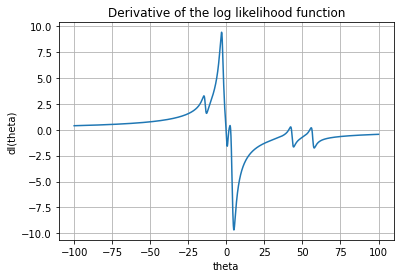

In [15]:
# Generate the Graph for the first order derivative of log-likelihood function

# Modify dlogL s.t. it supports element-wise operation for vector input
dlogL_v = np.vectorize(dlogL)


fig, ax = plt.subplots()

ax.set_xlabel('theta')
ax.set_ylabel('dl(theta)')
ax.set_title('Derivative of the log likelihood function')
ax.grid()

MyTheta = np.arange(-100,100,0.001)
ax.plot(MyTheta, dlogL_v(MyTheta))

#### b)

In [16]:
# Implement bisection method
def bisection(f, a, b, tol):
    
    # count iterations
    count = 0
    while b-a >= tol:
        p = (a+b)/2
        count = count+1
        if f(p)*f(a) <= 0:
            b = p
        elif f(p)*f(b)<=0:
            a = p
        elif count > 10**4:
            raise RuntimeError("Too many iterations without converging!")
    return (a+b)/2

In [18]:
theta_hat = bisection(dlogL,-1,1,10**-10)
print(theta_hat)

# This is the correct result! 

-0.1922866132517811


In [19]:
# Error 1: initial value have the same signs:
print(np.sign(dlogL(-1)*dlogL(-0.5)))
bisection(dlogL,-1,-0.5,10**-10)

1.0


RuntimeError: Too many iterations without converging!

In [20]:
# Error 2: containing other local maximum or minumum:
theta_tilda = bisection(dlogL,-1,5,10**-10)
print(theta_tilda)
print(ddlogL(theta_tilda)) # <0: At least Local maximum
logL(theta_tilda,MyX) - logL(theta_hat,MyX) # <<0: confirm it is only local maximun

2.817472165552317
-2.195574786546613


-1.4446417183678193

In [21]:
# Error 3: Initial interval too small s.t. the algorithm exits immediately
theta_tilda = bisection(dlogL,100,100+10**-12,10**-10)
print(theta_tilda)

100.0000000000005


##### c)

In [22]:
# Implement Secant's method
def secant(f, x0, x1, tol):
    '''Using secant method to solve f(x) = 0 numerically.
        For the sake of doing analysis, 
        1. The value of x will be printed for each iteration.
        2. The failure of convergence will force the algorithm to exit. (RuntimeError will be raised)
        3. The Denominator is checked not to be zero.
    '''
    print('------Starting iteration------')
    
    # Record the number of iterations
    count = 0
    while 1:
        try:
            x2 = x1 - f(x1)*(x1-x0)/(f(x1)-f(x0))
        except ZeroDivisionError:
            print("The denominator is 0! Secant's method fails!")
        print('%.10f' %x1)
        count = count + 1  
        if abs(x2-x1) < tol:
            print('-------End of iteration-------')
            break
        if count > 10**3:
            raise RuntimeError("Too many iterations without converge!")
        x1,x0 = x2,x1
        
    return x1

In [23]:
secant(dlogL, -2,-1, 10**-10)

# The result looks good

------Starting iteration------
-1.0000000000
-0.4412057633
-0.1245641517
-0.1984022443
-0.1923655101
-0.1922864937
-0.1922866132
-------End of iteration-------


-0.1922866132319395

In [27]:
# using (-3,3) as initial points
print('Result:',secant(dlogL, -3, 3, 10**-10))

# It converges to a local maximum!
print('Second order derivative:',ddlogL(2.8174721655730943))

# Compare the two sets initial values

print(logL(-0.1922866132319395,MyX))
print(logL(2.8174721655730943,MyX))

# -72.9>-74.4
# This confirms that the (-3, 3) as inital point only leads to a local maximum.

------Starting iteration------
3.0000000000
2.6857885400
2.7835315369
2.8260833368
2.8170133442
2.8174662267
2.8174721697
2.8174721656
-------End of iteration-------
Result: 2.8174721655730943
Second order derivative: -2.195574786685194
-72.91581961584612
-74.36046133421394


### Question 5

Log-likelihood function: <br>
$l(\theta) = -n\log(2\pi)+\sum^n_{i = 1}\log[1-\cos(\theta-X_i)]$ <br><br>

First-Order derivative: <br>
$\frac{dl(\theta)}{d\theta} = \sum^n_{i = 1}\frac{\sin(\theta-X_i)}{1-\cos(\theta-X_i)}$ <br><br>

Second-Order derivative: <br>
$\frac{d^2l(\theta)}{d\theta^2} = \sum^n_{i=1}\frac{1}{\cos(\theta-X_i)-1}$

#### a)

In [28]:
# Load the data and log-likelihood function
X = np.array([3.91, 4.85, 2.28, 4.06, 3.70, 4.04, 5.46,
              3.53, 2.28, 1.96, 2.53, 3.88, 2.22, 3.47, 4.82, 2.46, 2.99, 2.54, 0.52, 2.50])

logL = lambda theta: -X.size*np.log(2*np.pi)+np.sum(np.log(1-np.cos(theta-X)))

# Make it broadcast for an array of theta
logL_v = np.vectorize(logL)

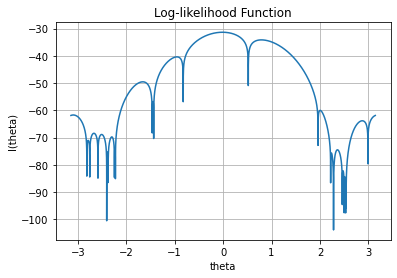

In [29]:
# Plot the log likelihood function

# Graph configurations
fig, ax = plt.subplots()
ax.set_title('Log-likelihood Function')
ax.set_xlabel('theta')
ax.set_ylabel('l(theta)')
ax.grid()

# Plot 
Thetas = np.linspace(-np.pi,np.pi,100000)
ax.plot(Thetas,logL_v(Thetas))


#### b)

Method of Moments: <br>

$E_\hat{\theta}(X) = \frac{1}{n}\sum_{i=1}^nX_i$ <br>
Where $ RHS = 3.20 $ <br>
$ LHS = \int^{2\pi}_0xf(x)dx = \int^{2\pi}_0[\frac{x}{2\pi}-\frac{x}{2\pi}\cos(x-\hat{\theta})]dx = \pi-\int^{2\pi-\hat{\theta}}_{-\hat{\theta}}\frac{x}{2\pi}\cos xdx = \pi - \frac{1}{2\pi}(-2\pi\sin\hat{\theta}) = \pi+\sin\hat{\theta}$ <br><br>
As a result, $\hat\theta = \arcsin(3.20 - \pi) = 0.0584$

In [30]:
# Calculate some values for the above estimation
print(X.mean())
theta_MM = np.arcsin(X.mean()-np.pi)
print(theta_MM)

3.2
0.05844060614042408


#### c)

In [31]:
# Load the derivatives of the log likelihood function

# first order derivative
dlogL = lambda theta: np.sum(np.sin(theta - X)/(1 - np.cos(theta - X)))
# second order derivative
ddlogL = lambda theta: np.sum(1/(np.cos(theta - X) - 1)) 

In [32]:
# Apply the newton's algorithm in Question 4
newton(dlogL, ddlogL, theta_MM, 10**-10)

------Starting iteration------
-0.0090985737
-0.0119687379
-0.0119720023
-0.0119720023
-------End of iteration-------


-0.011972002287439873

In [33]:
# Start from -2.7
theta1 = newton(dlogL, ddlogL, -2.7, 10**-10)
print(theta1)
print('second order derivative:', ddlogL(theta1))

# second order derivative is negative --> It is a local but not global maximum (also can be drawn from the graph)

------Starting iteration------
-2.6741136558
-2.6667939271
-2.6666999271
-2.6666999261
-2.6666999261
-------End of iteration-------
-2.666699926100948
second order derivative: -743.4266635634798


In [34]:
# Start from 2.7
theta2 = newton(dlogL, ddlogL, 2.7, 10**-10)
print(theta2)
print('second order derivative:', ddlogL(theta2))

# second order derivative is negative --> It is another local but not global maximum (also can be drawn from the graph)

------Starting iteration------
2.8257244846
2.8775491083
2.8731844561
2.8730945490
2.8730945142
2.8730945142
-------End of iteration-------
2.8730945142450777
second order derivative: -251.11503458688327


### Question 6

Denote the interval we want as $[x_1,x_2]$, given the pdf is a continuous function, the two ends of the interval must evaluate to the same value so that the density for every point contained in the interval is never lower than that for every point outside. <br>
i.e. $f_X(x_1) = f_X(x_2)$  <br>
Also, the pdf or $N(1,4)$ is symmetric about $x = 1$ and monotonous within each side separated by the axis of symmetry.<br> Therefore, we have $x_1 + x_2 = 2$  <br>
Denote the cdf as $\psi(x)$, we have $\psi(x_2) - \psi(x_1) = 0.95$ <br>
Therefore,  $h(x_1) := \psi(2-x_1) - \psi(x_1) - 0.95 = 0$<br>
Take its derivative, we have $h^{'}(x) = -f_X(2-x)-f_X(x)$

In [35]:
# create the distribution
MyNormal = norm(loc = 1,scale = 2)

In [36]:
# Create the function for which we need to calculate the zero point
h = lambda x: MyNormal.cdf(2-x)-MyNormal.cdf(x)-0.95
dh = lambda x: -MyNormal.pdf(2-x)-MyNormal.pdf(x)

In [37]:
# Find the x1
x1 = newton(h,dh,0,10**-10)
print('The interval is [',x1,',',2-x1,']')

------Starting iteration------
-1.6107098153
-2.4437938864
-2.8311202474
-2.9162285249
-2.9199212754
-2.9199279691
-2.9199279691
-------End of iteration-------
The interval is [ -2.9199279690801077 , 4.919927969080108 ]


In [38]:
# DoubleCheck
MyNormal.cdf(4.919927969080108)-MyNormal.cdf(-2.9199279690801077 )

0.95

## Done!